In [4]:
import numpy as np


def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [5]:
priors = [1/3, 1/3, 1/3]
likelihoods = [0.3, 0.2, 0.7]

bayes_rule(priors, likelihoods)

array([0.25      , 0.16666667, 0.58333333])

In [6]:
priors = [1/3, 1/3, 1/3]
likelihoods = [0.4, 0.6, 0.1]

bayes_rule(priors, likelihoods)

array([0.36363636, 0.54545455, 0.09090909])

0      0.766390
1      0.400619
2      0.474887
3      0.937195
4      0.768625
         ...   
995    0.552405
996    0.361343
997    0.644760
998    0.462370
999    0.215134
Length: 1000, dtype: float64

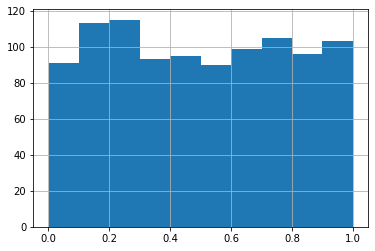

In [17]:


import pandas as pd 

n_draws = 1000
prior = pd.Series(np.random.uniform(0,1, size=n_draws))


prior.hist()

prior

In [15]:
observed = 10
def generative_model(param):
    result = np.random.binomial(50, param)
    return result 


13

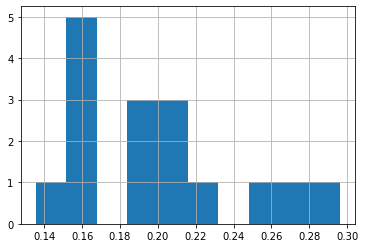

In [20]:
sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))
    
    
posterior = prior[list(map(lambda x: x == observed, sim_data))]

posterior.hist()




In [12]:
posterior.describe()

count    24.000000
mean      0.212361
std       0.045898
min       0.134618
25%       0.184023
50%       0.208041
75%       0.248563
max       0.294199
dtype: float64

In [21]:
print(posterior.quantile(0.025), '|', posterior.quantile(.975))


0.14267914895942052 | 0.288919054468475


In [22]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|', probability)

Maximum Likelihood Estimate:  0.16 | 0.1875


PCA 

PCA is a dimensionality reduction technique that is used to transofrm our data.
Whta motivate us to reduce the dimensions of our data?

a. We may want to speed up the performance of our model by providing it with less variables 

b. We may have many columns of very sparse data. By using PCA, we have fewer columns with less sparsity. This may improve the performance of our model.


Creating less variables that are a funtion of our original data enable us to accomplish these goals. 







In [24]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']

breast_cancer = pd.read_csv(r'C:\Users\Yael Aguilar\Documents\datamex_102020\module-2\lab-pca\your-code\breast-cancer.csv', names = total_cols)
breast_cancer.head()

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [38]:
from sklearn.decomposition import PCA
numeric_columns = [x for x in total_cols if x not in ['id', 'outcome', 'time',
                                                     'lymph_status']]

breast_cancer_numeric = breast_cancer[numeric_columns]
pc = PCA(np.array(breast_cancer_numeric), n_components=2)
print(pc.shape)


AttributeError: 'PCA' object has no attribute 'shape'